In [1]:
import pandas as pd

# ユーザー情報の読み込み
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)
users.head(3)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [2]:
# レーティング情報の読み込み
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'],unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [3]:
# 映画情報の読み込み
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding = "latin1")
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [4]:
# 3つの情報をマージする
movie_rating = pd.merge(movies, ratings)
lens = pd.merge(movie_rating, users)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,date,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,1998-02-17 17:31:36,60,M,retired,95076


In [5]:
# 最も評価された25作品のタイトル
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Future (

In [6]:
import numpy as np

# レーティングの数と平均で集計し、平均値でソートする
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [7]:
# 100件以上の評価が付いている映画に絞って上位15件をチェックする
atleast_100 = movie_stats['rating']['size'] >=100
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False).head(15)

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

Text(0, 0.5, 'count of rating')

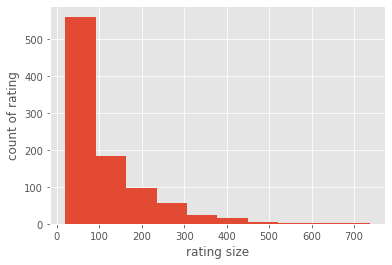

In [8]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# user_idごとの評価数のヒストグラム
lens.groupby('user_id').size().sort_values(ascending=False).hist()

plt.xlabel('rating size')
plt.ylabel('count of rating')

In [9]:
# ユーザー毎の評価数と評価の平均の統計情報
user_stats = lens.groupby('user_id').agg({'rating': [np.size, np.mean]})
user_stats['rating'].describe()

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


## Factorization Machinesを使った推薦

In [11]:
%matplotlib inline
from sklearn.model_selection import learning_curve
import numpy as np
from fastFM import als

from sklearn.feature_extraction import DictVectorizer

train = [
    {"user": "1", "item": "5", "age": 19},
    {"user": "2", "item": "43", "age": 33},
    {"user": "3", "item": "20", "age": 55},
    {"user": "4", "item": "10", "age": 20},
]
v = DictVectorizer()
X = v.fit_transform(train)
print(X.toarray())
y = np.array([5.0, 1.0, 2.0, 4.0])
fm = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=2, l2_reg_w=0.1, l2_reg_V=0.5)
fm.fit(X, y)
fm.predict(v.transform({"user": "5", "item": "10", "age": 24}))

[[19.  0.  0.  0.  1.  1.  0.  0.  0.]
 [33.  0.  0.  1.  0.  0.  1.  0.  0.]
 [55.  0.  1.  0.  0.  0.  0.  1.  0.]
 [20.  1.  0.  0.  0.  0.  0.  0.  1.]]


array([3.60775939])

In [18]:
# Read in data
def loadData(filename, path="ml-100k/"):
    data = []
    y = []
    users=set()
    items=set()
    with open(path+filename) as f:
        for line in f:
            (user, movieid, rating, ts)=line.split('\t')
            data.append({ "user_id": str(user), "movie_id": str(movieid)})
            y.append(float(rating))
            users.add(user)
            items.add(movieid)

    return (data, np.array(y), users, items)


In [19]:
(dev_data, y_dev, dev_users, dev_items) = loadData("ua.base")
(test_data, y_test, test_users, test_items) = loadData("ua.test")

In [26]:
from sklearn.model_selection import train_test_split

v = DictVectorizer()
X_dev = v.fit_transform(dev_data)
X_test = v.transform(test_data)
np.std(y_test)
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

0.8959692745565979


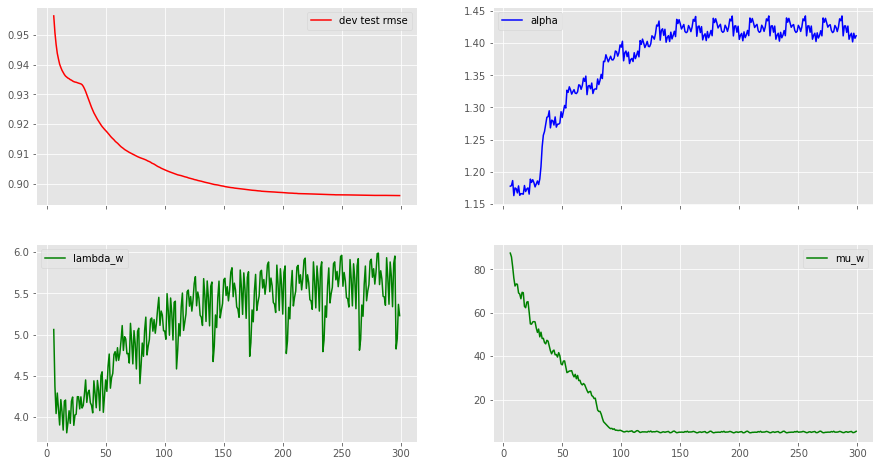

In [29]:
from sklearn.metrics import mean_squared_error
from fastFM import mcmc

n_iter = 300
step_size = 1
seed = 123
rank = 4

fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
# Allocates and initalizes the model and hyper parameter.
fm.fit_predict(X_train, y_train, X_dev_test)

rmse_dev_test = []
rmse_test = []
hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)

for nr, i in enumerate(range(1, n_iter)):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_dev_test)))
    hyper_param[nr, :] = fm.hyper_param_
    
values = np.arange(1, n_iter)
x = values * step_size
burn_in = 5
x = x[burn_in:]

from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

axes[0, 0].plot(x, rmse_test[burn_in:], label='dev test rmse', color="r")
axes[0, 0].legend()
axes[0, 1].plot(x, hyper_param[burn_in:,0], label='alpha', color="b")
axes[0, 1].legend()
axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g")
axes[1, 0].legend()
axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g")
axes[1, 1].legend()

print(np.min(rmse_test))

In [30]:
n_iter = 100
rank = 4
seed = 333
step_size = 1

fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
# initalize coefs
fm.fit_predict(X_train, y_train, X_dev_test)

rmse_test = []
rmse_new = []
hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)
for nr, i in enumerate(range(1, n_iter)):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_dev_test)))
    hyper_param[nr, :] = fm.hyper_param_

------- restart ----------
iter:10 rmse:0.941
iter:20 rmse:0.935
iter:30 rmse:0.934
iter:40 rmse:0.932
iter:50 rmse:0.923
iter:60 rmse:0.917
iter:70 rmse:0.913
iter:80 rmse:0.909
iter:90 rmse:0.906


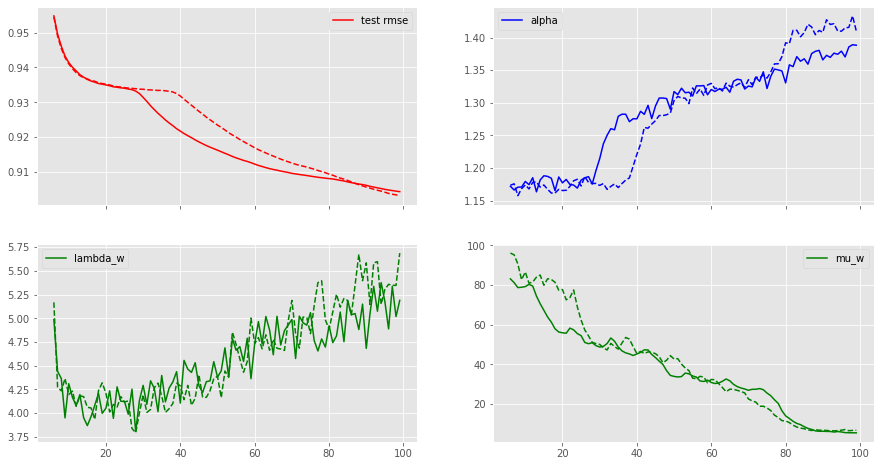

min rmse: 0.903


In [31]:
print('------- restart ----------')
values = np.arange(1, n_iter)
rmse_test_re = []
hyper_param_re = np.zeros((len(values), 3 + 2 * rank), dtype=np.float64)
for nr, i in enumerate(values):
    fm = mcmc.FMRegression(n_iter=i, rank=rank, random_state=seed)
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_dev_test))
    rmse_test_re.append(rmse)
    hyper_param_re[nr, :] = fm.hyper_param_
    if i % 10 == 0:
        print('iter:{} rmse:{:.3f}'.format(i, rmse))
        
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

x = values * step_size
burn_in = 5
x = x[burn_in:]

#with plt.style.context('ggplot'):
axes[0, 0].plot(x, rmse_test[burn_in:], label='test rmse', color="r")
axes[0, 0].plot(values[burn_in:], rmse_test_re[burn_in:], ls="--", color="r")
axes[0, 0].legend()

axes[0, 1].plot(x, hyper_param[burn_in:,0], label='alpha', color="b")
axes[0, 1].plot(values[burn_in:], hyper_param_re[burn_in:,0], ls="--", color="b")
axes[0, 1].legend()

axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g")
axes[1, 0].plot(values[burn_in:], hyper_param_re[burn_in:,1], ls="--", color="g")
axes[1, 0].legend()

axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g")
axes[1, 1].plot(values[burn_in:], hyper_param_re[burn_in:,3], ls="--", color="g")
axes[1, 1].legend()

plt.show()
print("min rmse: {:.3f}".format(np.min(rmse_test_re)))

## Rankの影響

交互作用のランクによるRMSEへの影響を確認。

rank:4	rmse:0.903
rank:8	rmse:0.898
rank:16	rmse:0.896
rank:32	rmse:0.893
rank:64	rmse:0.893
min rmse: 0.893


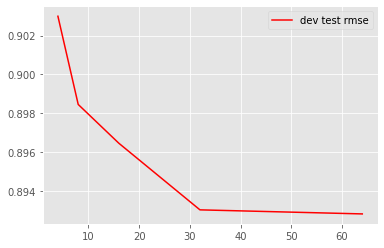

In [32]:
n_iter = 100
seed = 333

rmse_test = []

ranks = [4, 8, 16, 32, 64]

for rank in ranks:
    fm = mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
    y_pred = fm.fit_predict(X_train, y_train, X_dev_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_dev_test))
    rmse_test.append(rmse)
    print('rank:{}\trmse:{:.3f}'.format(rank, rmse))
    
plt.plot(ranks, rmse_test, label='dev test rmse', color="r")
plt.legend()

print("min rmse: {:.3f}".format(np.min(rmse_test)))

### テストデータで評価

In [33]:
fm = mcmc.FMRegression(n_iter=300, rank=32, random_state=seed)
y_pred = fm.fit_predict(X_train, y_train, X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

0.921496840062798

## 標準化の影響
レーティングの値の標準化による影響を確認

In [34]:
from sklearn.preprocessing import StandardScaler

# Check the effecto of standardization
scaler = StandardScaler()
y_train_norm = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
fm = mcmc.FMRegression(n_iter=300, rank=32, random_state=seed)
y_pred = fm.fit_predict(X_train, y_train_norm, X_test)
np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred), y_test))

0.9203443782544464

## ユーザーと映画以外のコンテキストも加える

In [35]:
lens['user_id'] = lens['user_id'].astype(str)
lens['movie_id'] = lens['movie_id'].astype(str)
lens['year'] = lens['date'].apply(str).str.split('-').str.get(0)
lens['release_year'] = lens['release_date'].apply(str).str.split('-').str.get(2)

candidate_columns = [
    ['user_id','movie_id', 'release_year', 'age', 'sex', 'year',  'rating'],
    ['user_id','movie_id', 'age', 'sex', 'year',  'rating'],
    ['user_id','movie_id', 'sex', 'year',  'rating'],
    ['user_id','movie_id', 'age', 'sex', 'rating'],    
    ['user_id','movie_id', 'rating'],    
]

rmse_test = []

n_iter = 500
seed = 123
rank = 8

for column in candidate_columns:
    # 欠損値を落とす
    filtered_lens = lens[column].dropna()
    # 入力データをダミー変数に変換する
    v = DictVectorizer()
    X_more_feature = v.fit_transform(list(filtered_lens.drop('rating', axis=1).T.to_dict().values()))
    y_more_feature = filtered_lens['rating'].tolist()

    X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_more_feature, y_more_feature, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    y_mf_train_norm = scaler.fit_transform(np.array(y_mf_train).reshape(-1, 1)).ravel()

    fm = mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
    # Allocates and initalizes the model and hyper parameter.
    fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)

    y_pred = fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)
    rmse_test.append(np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred.reshape(-1, 1)), y_mf_test)))

print(rmse_test)

[0.8966348934997591, 0.8943648217648883, 0.8850451737482935, 0.8922375852811406, 0.887744557428427]


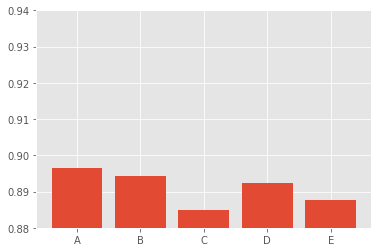

In [37]:
ind = np.arange(len(rmse_test))
bar = plt.bar(ind, height=rmse_test)
plt.xticks(ind, ('A', 'B', 'C', 'D', 'E'))
plt.ylim((0.88, 0.94));

In [44]:
n_iter = 500
seed = 123
rank = 8

# 1番良い結果のカラム組み合わせ
col = ['user_id','movie_id', 'sex', 'year',  'rating']

# 欠損値を落とす
filtered_lens = lens[column].dropna()
# 入力データをダミー変数に変換する
v = DictVectorizer()
X_more_feature = v.fit_transform(list(filtered_lens.drop('rating', axis=1).T.to_dict().values()))
y_more_feature = filtered_lens['rating'].tolist()

X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_more_feature, y_more_feature, test_size=0.1, random_state=42)

scaler = StandardScaler()
y_mf_train_norm = scaler.fit_transform(np.array(y_mf_train).reshape(-1, 1)).ravel()

fm = mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
# Allocates and initalizes the model and hyper parameter.


y_pred = fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)

In [46]:
scaler.inverse_transform(y_pred.reshape(-1, 1))

array([[4.37891311],
       [4.51060792],
       [3.32425455],
       ...,
       [4.0367629 ],
       [3.01674779],
       [3.71354782]])